<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd ../gdrive/MyDrive/CSE_575/

/gdrive/.shortcut-targets-by-id/1ZOjaaJR6FUgi-AiS0aWel7Gqn2TpkqgW/CSE_575


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [4]:
seed = 0

In [5]:
X = np.load("X.npy")[:, :, :, :3]
y = np.load("y.npy")

In [6]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))
labels = encoder.categories_[0]

In [7]:
n_samples = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=round(0.7 * n_samples), stratify=y, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=round(0.15 * n_samples), stratify=y_test, random_state=seed)

In [8]:
model_layers = [
    Conv2D(64, (3, 3), input_shape=(288, 432, 3)),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.2),

    Conv2D(64, (3, 3)),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.2),

    Conv2D(64, (3, 3)),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.2),

    Flatten(),

    Dense(10, activation="softmax")
]

model = Sequential(model_layers)

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 143, 64)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 95, 143, 64)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 141, 64)       36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 47, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 47, 64)        0

In [11]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=10)

Epoch 1/20
70/70 [==============================] - 16s 80ms/step - loss: 2.2317 - accuracy: 0.1786 - val_loss: 1.7661 - val_accuracy: 0.3200
Epoch 2/20
70/70 [==============================] - 5s 78ms/step - loss: 1.8227 - accuracy: 0.3414 - val_loss: 1.3893 - val_accuracy: 0.5000
Epoch 3/20
70/70 [==============================] - 5s 74ms/step - loss: 1.4514 - accuracy: 0.4957 - val_loss: 1.3363 - val_accuracy: 0.5333
Epoch 4/20
70/70 [==============================] - 5s 73ms/step - loss: 1.2751 - accuracy: 0.5400 - val_loss: 1.0534 - val_accuracy: 0.6000
Epoch 5/20
70/70 [==============================] - 6s 79ms/step - loss: 1.0930 - accuracy: 0.6329 - val_loss: 1.1671 - val_accuracy: 0.5733
Epoch 6/20
70/70 [==============================] - 5s 72ms/step - loss: 0.9046 - accuracy: 0.6829 - val_loss: 1.0008 - val_accuracy: 0.6533
Epoch 7/20
70/70 [==============================] - 5s 73ms/step - loss: 0.7312 - accuracy: 0.7443 - val_loss: 1.0103 - val_accuracy: 0.7000
Epoch 8/20
7

In [12]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

22/22 [==============================] - 3s 88ms/step - loss: 0.0010 - accuracy: 1.0000
Training Accuracy: 1.0


In [13]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

5/5 [==============================] - 1s 190ms/step


In [14]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.88      0.93      0.90        15
           2       0.67      0.67      0.67        15
           3       0.45      0.67      0.54        15
           4       0.67      0.53      0.59        15
           5       0.73      0.79      0.76        14
           6       0.92      0.80      0.86        15
           7       0.67      0.40      0.50        15
           8       0.56      0.67      0.61        15
           9       0.40      0.40      0.40        15

    accuracy                           0.63       149
   macro avg       0.64      0.63      0.63       149
weighted avg       0.64      0.63      0.63       149



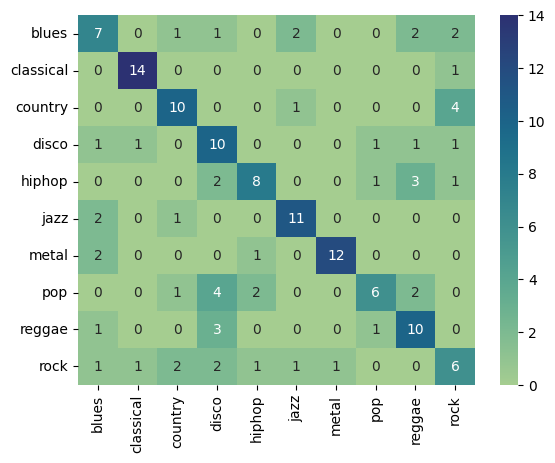

In [15]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('/content/CNN_Confusion_Matrix.png', dpi=300)

In [16]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.6308724832214765


In [17]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.47
classical,0.93
country,0.67
disco,0.67
hiphop,0.53
jazz,0.79
metal,0.80
pop,0.40
reggae,0.67
rock,0.40


In [18]:
model.save('/content/CNN.h5')